#https://towardsdatascience.com/financial-data-from-yahoo-finance-with-python-b5399743bcc6 
import sys
!{sys.executable} -m pip install yfinance


In [1]:
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn

In [2]:
# SP500 complete
start=datetime.datetime(1992, 1, 1)
end=datetime.datetime(2013, 1, 1)
SP500 = yf.Ticker("^GSPC")
SP500 = SP500.history(start = start, end = end)


In [3]:
print(SP500.index)

DatetimeIndex(['1991-12-31', '1992-01-02', '1992-01-03', '1992-01-06',
               '1992-01-07', '1992-01-08', '1992-01-09', '1992-01-10',
               '1992-01-13', '1992-01-14',
               ...
               '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20',
               '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27',
               '2012-12-28', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=5292, freq=None)


In [4]:
# Get Sector Data from Wikipedia
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
#show unique economy sectors
sectors = df['GICS Sector'].values.tolist()
sectors = set(sectors)

In [5]:
print(sectors)

{'Consumer Staples', 'Utilities', 'Health Care', 'Real Estate', 'Materials', 'Financials', 'Information Technology', 'Consumer Discretionary', 'Industrials', 'Energy', 'Communication Services'}


In [6]:
def SectorNormReturns(sec,df, start, end, lag):
    # takes the name of a sector and returns the aggregated data of all companies' normalised returns from 
    # start to endhich have full data for this time period
    # Normalising via averages over lag
    #  df = pandas Dataframe of company symbols "Symbol" and sector "GICS Sector"
    
    SP500 = yf.Ticker("^GSPC")
    SP500 = SP500.history(start = start, end = end)
    Output = 0*SP500["Close"] # this is the output pandas series
    
    List = df[df['GICS Sector'] == sec]['Symbol'].values.tolist() # list of all companies in sector
    
    
    
    for sym in List:
        StockData = yf.Ticker(sym)
        StockData = StockData.history(start = start, end = end)
        StockData = StockData["Close"]
     
        
        # only add stocks to sector data which have full history
        if len(StockData.index) == len(SP500.index):
            
            
            
            # calculate returns
            StockData = (StockData.diff()/StockData) 
        
            # Shift the data to calculate the average of the last "lag" returns before current date
            Shift = pd.Series(StockData.iloc[0:(len(StockData)-1)])
            Shift.index = StockData.index[1:] 
            
            
            #print(sym)
            PlusOutput = (StockData-Shift.rolling(lag).mean())/Shift.rolling(lag).std()
            #print(PlusOutput)
            
            Output = Output.add(PlusOutput)
        
        
    return(Output)

In [7]:
# Normalizes returns

NormRetDF = pd.DataFrame(data = ())


for s in sectors:
    print(s)
    SectorDF = df[df["GICS Sector"] == s]
    SectorSymbols = SectorDF['Symbol'].values.tolist()
    
    #Seclist.append(SectorPrices(s, start, end))
    NormRetDF[s] = SectorNormReturns(s, df,start, end, 13)
    
    

Consumer Staples
- BF.B: No data found for this date range, symbol may be delisted
- KHC: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- LW: Data doesn't exist for startDate = 694220400, endDate = 1356994800
Utilities
Health Care
- ABBV: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- CTLT: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- IQV: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- MRNA: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- OGN: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- ZTS: Data doesn't exist for startDate = 694220400, endDate = 1356994800
Real Estate
Materials
- CTVA: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- DOW: Data doesn't exist for startDate = 694220400, endDate = 1356994800
- WRK: Data doesn't exist for startDate = 694220400, endDate = 1356994800
Financials
- BRK.B: No data found, symbol may be deliste

In [8]:
print(NormRetDF)

            Consumer Staples  Utilities  Health Care  Real Estate  Materials  \
Date                                                                           
1991-12-31               NaN        NaN          NaN          NaN        NaN   
1992-01-02               NaN        NaN          NaN          NaN        NaN   
1992-01-03               NaN        NaN          NaN          NaN        NaN   
1992-01-06               NaN        NaN          NaN          NaN        NaN   
1992-01-07               NaN        NaN          NaN          NaN        NaN   
...                      ...        ...          ...          ...        ...   
2012-12-24         -4.692561 -13.112035   -11.994853    -0.246333   3.406330   
2012-12-26        -24.197483 -31.229525   -34.816004   -10.943113  -3.626107   
2012-12-27          2.022061  -4.423728    -0.905667     1.703516 -10.486140   
2012-12-28        -24.382191 -25.023825   -38.538145   -10.332530 -24.452935   
2012-12-31         37.987801  41.733217 

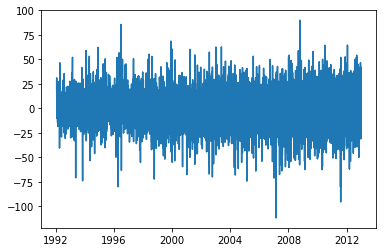

In [9]:
plt.plot(NormRetDF["Utilities"])

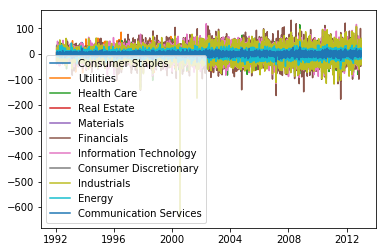

In [10]:
for i in NormRetDF.columns:
    plt.plot(NormRetDF[i], label=i)
    
plt.legend()
plt.show()

Something stragne happened in the IT data:

In [11]:
NormRetDF.idxmin()

Consumer Staples         1992-01-31
Utilities                2007-02-27
Health Care              1997-10-27
Real Estate              2011-08-08
Materials                2001-09-17
Financials               2011-08-08
Information Technology   2000-11-29
Consumer Discretionary   2001-09-17
Industrials              2000-07-13
Energy                   2011-08-04
Communication Services   2001-09-17
dtype: datetime64[ns]

In [12]:
NormRetDF.loc["2000-11-29"]

Consumer Staples          11.538412
Utilities                 15.139085
Health Care               21.686466
Real Estate                5.932929
Materials                  5.108588
Financials                50.608385
Information Technology         -inf
Consumer Discretionary    -0.726280
Industrials               21.910403
Energy                   -35.892183
Communication Services     0.580095
Name: 2000-11-29 00:00:00, dtype: float64

In [13]:
IT = set(df[df["GICS Sector"] =="Information Technology"]["Symbol"])
print(IT)

{'TXN', 'HPE', 'ANET', 'CDW', 'ANSS', 'FTNT', 'TRMB', 'ADI', 'AAPL', 'XLNX', 'IPGP', 'TEL', 'SNPS', 'PAYC', 'QRVO', 'INTU', 'JNPR', 'MU', 'TYL', 'HPQ', 'GPN', 'PTC', 'FISV', 'NXPI', 'DXC', 'KEYS', 'ADSK', 'CSCO', 'CDAY', 'FIS', 'MSI', 'IT', 'INTC', 'PAYX', 'PYPL', 'GLW', 'IBM', 'NVDA', 'TER', 'ACN', 'NLOK', 'MSFT', 'ORCL', 'V', 'APH', 'WU', 'QCOM', 'ADP', 'SWKS', 'KLAC', 'MCHP', 'CDNS', 'ADBE', 'STX', 'WDC', 'ZBRA', 'AVGO', 'MA', 'CTSH', 'AKAM', 'CTXS', 'LRCX', 'FLT', 'NTAP', 'VRSN', 'JKHY', 'NOW', 'CRM', 'BR', 'AMAT', 'ENPH', 'MPWR', 'FFIV', 'AMD'}


## Some Data Analysis

In [14]:
Corr = NormRetDF.corr()

for i in Corr.columns:
    print(np.mean(Corr[i]),i)

Corr

0.649643471310177 Consumer Staples
0.5564049663593317 Utilities
0.6884858415868397 Health Care
0.5834301002550096 Real Estate
0.6867715324232964 Materials
0.7027218421606048 Financials
0.6437778754473139 Information Technology
0.6906979765835458 Consumer Discretionary
0.7036568894507782 Industrials
0.5264185221450689 Energy
0.6554977240973221 Communication Services


,Consumer Staples,Utilities,Health Care,Real Estate,Materials,Financials,Information Technology,Consumer Discretionary,Industrials,Energy,Communication Services
Consumer Staples,1.000000,0.595332,0.722154,0.509475,0.647004,0.687969,0.565185,0.681124,0.655757,0.442183,0.639894
Utilities,0.595332,1.000000,0.534829,0.469994,0.522941,0.565322,0.429228,0.492986,0.515884,0.472984,0.520954
Health Care,0.722154,0.534829,1.000000,0.566152,0.686026,0.737183,0.694415,0.714423,0.730449,0.507013,0.680701
Real Estate,0.509475,0.469994,0.566152,1.000000,0.591725,0.635137,0.516146,0.612732,0.595207,0.400365,0.520797
Materials,0.647004,0.522941,0.686026,0.591725,1.000000,0.716144,0.653076,0.731399,0.784845,0.582742,0.638585
Financials,0.687969,0.565322,0.737183,0.635137,0.716144,1.000000,0.677571,0.764091,0.757986,0.480942,0.707595
Information Technology,0.565185,0.429228,0.694415,0.516146,0.653076,0.677571,1.000000,0.690941,0.712946,0.458110,0.683939
Consumer Discretionary,0.681124,0.492986,0.714423,0.612732,0.731399,0.764091,0.690941,1.000000,0.775078,0.454072,0.680830
Industrials,0.655757,0.515884,0.730449,0.595207,0.784845,0.757986,0.712946,0.775078,1.000000,0.533543,0.678530
Energy,0.442183,0.472984,0.507013,0.400365,0.582742,0.480942,0.458110,0.454072,0.533543,1.000000,0.458650


In [15]:
pca = PCA()
pca.fit(Corr)

PCA()

In [16]:
print(pca.explained_variance_ratio_)

[4.15593178e-01 1.65700775e-01 1.39709465e-01 8.66154866e-02
 5.40277719e-02 4.24611288e-02 3.22144560e-02 2.69137557e-02
 2.02076705e-02 1.65563128e-02 2.18075425e-35]


In [17]:
pca.components_

array([[-0.22140732,  0.22212682, -0.31390195, -0.11015579, -0.24235037,
        -0.33963916, -0.36967524, -0.40971922, -0.35129187,  0.31423115,
        -0.3003406 ],
       [-0.3610542 , -0.5608521 , -0.02885233, -0.17549076,  0.2272793 ,
        -0.10202193,  0.26342518,  0.01036259,  0.17671792,  0.59919743,
        -0.04029857],
       [-0.356275  , -0.28699225, -0.20381411,  0.803332  , -0.0256086 ,
         0.01227811, -0.05971105,  0.04833697, -0.03366306, -0.22501628,
        -0.21294866],
       [-0.28491307, -0.11382108, -0.06624361, -0.11275034, -0.47338904,
        -0.14364235,  0.5040869 , -0.18950038, -0.27148978, -0.26683534,
         0.45729242],
       [ 0.52916868, -0.54052133,  0.39883469,  0.12547444, -0.31162626,
        -0.13786886, -0.13664071, -0.0926819 , -0.30101815,  0.10832083,
        -0.08532038],
       [ 0.0161912 , -0.16634894, -0.27763687,  0.0735236 ,  0.05767754,
         0.19750486, -0.52913402,  0.04048135, -0.07492884,  0.17689189,
         0.727

## Interval-wise

In [18]:
Period = 40 # 2 trading months

T = int(len(NormRetDF)/Period)


for t in range(T):
    IntervalDF = NormRetDF.iloc[(0+t*Period):(Period+t*Period)]
    IntervalCorr = IntervalDF.corr()
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.4737421856566147 0
0.5163737620733659 1
0.6346311384806684 2
0.6244082798893482 3
0.4339619761185977 4
0.5851439278151332 5
0.4573215497910856 6
0.5781605412274627 7
0.3727950955373893 8
0.4469784490674819 9
0.39955638135834504 10
0.3299988331026867 11
0.5063779436086455 12
0.35444572143839087 13
0.47469390254510496 14
0.44852545584299086 15
0.3423602149450803 16
0.39325739797778353 17
0.585563111562813 18
0.34124517199329896 19
0.39727548047701083 20
0.38068862793577757 21
0.39999690149361067 22
0.45386506827635975 23
0.2817350780499671 24
0.46023353837450004 25
0.675535325832109 26
0.5005608816271744 27
0.5086252680355169 28
0.46209714679088953 29
0.34827039152245076 30
0.4088101444531619 31
0.48919084876228264 32
0.4648272919433536 33
0.5486522096846758 34
0.5181365284404438 35
0.5644292723004987 36
0.51534679673556 37
0.49364279265268196 38
0.5571471689212539 39
0.5408657890414476 40
0.3560980966654371 41
0.8878944089645346 42
0.41082029083374433 43
0.4751322136943067 44
0.528921

In [19]:
# now overlapping intervals
Period = 40 # 2 trading months
Shift = 10
T = int((len(NormRetDF) - Period)/Shift)

CorrMatrices = np.empty((T, 121))


for t in range(T):
    #print((0+t*Shift),(Period+t*Shift))
    IntervalDF = NormRetDF.iloc[(0+t*Shift):(Period+t*Shift)]
    IntervalCorr = IntervalDF.corr()
    CorrMatrices[t,:] = IntervalCorr.to_numpy().reshape(1,-1)
    
    pca = PCA()
    pca.fit(IntervalCorr)
    print(pca.explained_variance_ratio_[0], t)

0.4737421856566147 0
0.4505662067379941 1
0.41247697641022046 2
0.43446617830365464 3
0.5163737620733659 4
0.585583462752236 5
0.5721319100793494 6
0.7168633454418205 7
0.6346311384806684 8
0.5672137939336231 9
0.5656747943200091 10
0.688123385484602 11
0.6244082798893482 12
0.4465452225953187 13
0.5813667086494007 14
0.47963139605461236 15
0.4339619761185977 16
0.5112186140690509 17
0.5356659275314946 18
0.5505768639570998 19
0.5851439278151332 20
0.37925835347711295 21
0.34996581122559595 22
0.36720104209442783 23
0.4573215497910856 24
0.3686284163971358 25
0.5082639298765584 26
0.5472490289467811 27
0.5781605412274627 28
0.489319264853029 29
0.36846308550753115 30
0.36845902850992157 31
0.3727950955373893 32
0.4816406697487276 33
0.5297943905061533 34
0.5430548376572263 35
0.4469784490674819 36
0.33110334125278407 37
0.35880310354429956 38
0.3420136383369632 39
0.39955638135834504 40
0.4390786019608565 41
0.3323571826284249 42
0.3741439703175698 43
0.3299988331026867 44
0.3364362655

0.6228613049513888 372
0.659932911672504 373
0.5985112953970357 374
0.6636687240865012 375
0.4630721618758794 376
0.4289462460476238 377
0.5479865173373126 378
0.5102628007993114 379
0.5847666388561996 380
0.6317542326464529 381
0.5358115786490648 382
0.40147454808330935 383
0.37848735048582144 384
0.43618931310159664 385
0.42730619052652646 386
0.4703694934006088 387
0.5411922877932012 388
0.47402394678169296 389
0.4274621957564222 390
0.40591207068043955 391
0.3520114405068481 392
0.3839587074147423 393
0.40977677021133985 394
0.4187620501785721 395
0.4302201119906249 396
0.5302414005965889 397
0.5124671304380677 398
0.4931828455794324 399
0.5392610097345867 400
0.5012867453718459 401
0.5348190313291556 402
0.530834485386106 403
0.5081963345276007 404
0.4608076446060171 405
0.5535348760504067 406
0.5186729466337819 407
0.7030795014846578 408
0.7789971967283275 409
0.7894682542387748 410
0.8749409983576157 411
0.8566052474633752 412
0.8157999261584432 413
0.8604803599565358 414
0.8283


for t in range(T):
    print((0+t*Shift),(Period+t*Shift), SectorsDF.index[int(0.5*Period)+t*Shift])

In [20]:
print(CorrMatrices)
print(CorrMatrices.shape)

[[1.         0.36001805 0.83209233 ... 0.59179675 0.31926253 1.        ]
 [1.         0.34768087 0.77254283 ... 0.60896272 0.26427916 1.        ]
 [1.         0.43327556 0.75050395 ... 0.47020654 0.2332006  1.        ]
 ...
 [1.         0.59789932 0.75692807 ... 0.77273115 0.52096218 1.        ]
 [1.         0.57611216 0.83217268 ... 0.79463668 0.56214958 1.        ]
 [1.         0.61064265 0.80171975 ... 0.76163931 0.69693513 1.        ]]
(525, 121)


In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(CorrMatrices)

In [22]:
ClusterPred = kmeans.fit_predict(CorrMatrices)
print(len(ClusterPred))

525


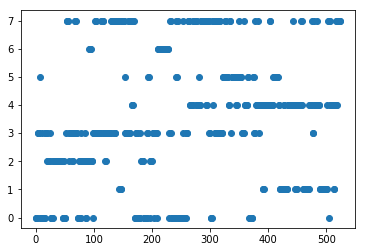

In [23]:
plt.scatter(np.arange(len(ClusterPred)), ClusterPred)
plt.show()

# That does not look like the original publication...